## Imports

In [35]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import sys
sys.path.append('/Users/tudorlapusan/Documents/workspaces/ml/DecisionTreeStructure/')

In [37]:
import numpy as np
import pandas as pd
import graphviz
from matplotlib import pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from tree.decision_tree_structure import DecisionTreeStructure

## Data load

In [4]:
train_raw = pd.read_csv("../data/train_titanic.csv")

In [5]:
train_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## EDA

In [6]:
train_raw.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [7]:
train_raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data transformation

#### Age

In [8]:
train_raw["Age_na"] = train_raw["Age"].isna().astype(int)
train_raw.fillna({"Age":train_raw.median()["Age"]}, inplace=True)

#### Sex

In [9]:
train_raw["Sex_label"] = train_raw["Sex"].astype("category").cat.codes

In [10]:
train_raw["Cabin_label"] = train_raw["Cabin"].astype("category").cat.codes
train_raw["Embarked_label"] = train_raw["Embarked"].astype("category").cat.codes

In [11]:
train_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_na,Sex_label,Cabin_label,Embarked_label
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,-1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,81,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,-1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,55,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,-1,2
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,1,1,-1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1,129,2
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,1,-1,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,0,-1,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,0,-1,0


## Model training

In [21]:
features = ["Pclass", "Age", "Age_na", "Sex_label", "SibSp", "Parch", "Fare", "Cabin_label", "Embarked_label"]
target = "Survived"

In [23]:
model = DecisionTreeClassifier(max_depth=8)
model.fit(train_raw[features], train_raw[target])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Decision tree structure visualizations

### Decision Tree Structure

In [39]:
import sklearn

In [61]:
help(sklearn.tree._tree.Tree)

Help on class Tree in module sklearn.tree._tree:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The maximal depth of the tree.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child of node i.
 |      For leaves,

In [62]:
dts = DecisionTreeStructure(model, features)

In [63]:
help(model)

Help on DecisionTreeClassifier in module sklearn.tree.tree object:

class DecisionTreeClassifier(BaseDecisionTree, sklearn.base.ClassifierMixin)
 |  DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : string, optional (default="best")
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split

In [56]:
help(dts)

Help on DecisionTreeStructure in module tree.decision_tree_structure object:

class DecisionTreeStructure(builtins.object)
 |  DecisionTreeStructure(tree, features)
 |  
 |  A visual interpretation of decision tree structure.
 |  
 |  It contains two types of visualisations :
 |      - visualisations related to leaf nodes
 |      - visualisations about tree predictions
 |  
 |  Parameters
 |  ----------
 |  tree : sklearn.tree.tree.DecisionTreeClassifier
 |      The tree to investigate
 |  
 |  features : list
 |      The list of features names
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes from the tree
 |  
 |  children_left : array of int, shape[node_count]
 |      children_left[i] holds the node id of the left child node of node i.
 |      For leaves, children_left[i] == TREE_LEAF
 |  
 |  children_right : array of int, shape[node_count]
 |      children_right[i] holds the node id of the right child node of node i.
 |      For leaves, children_r

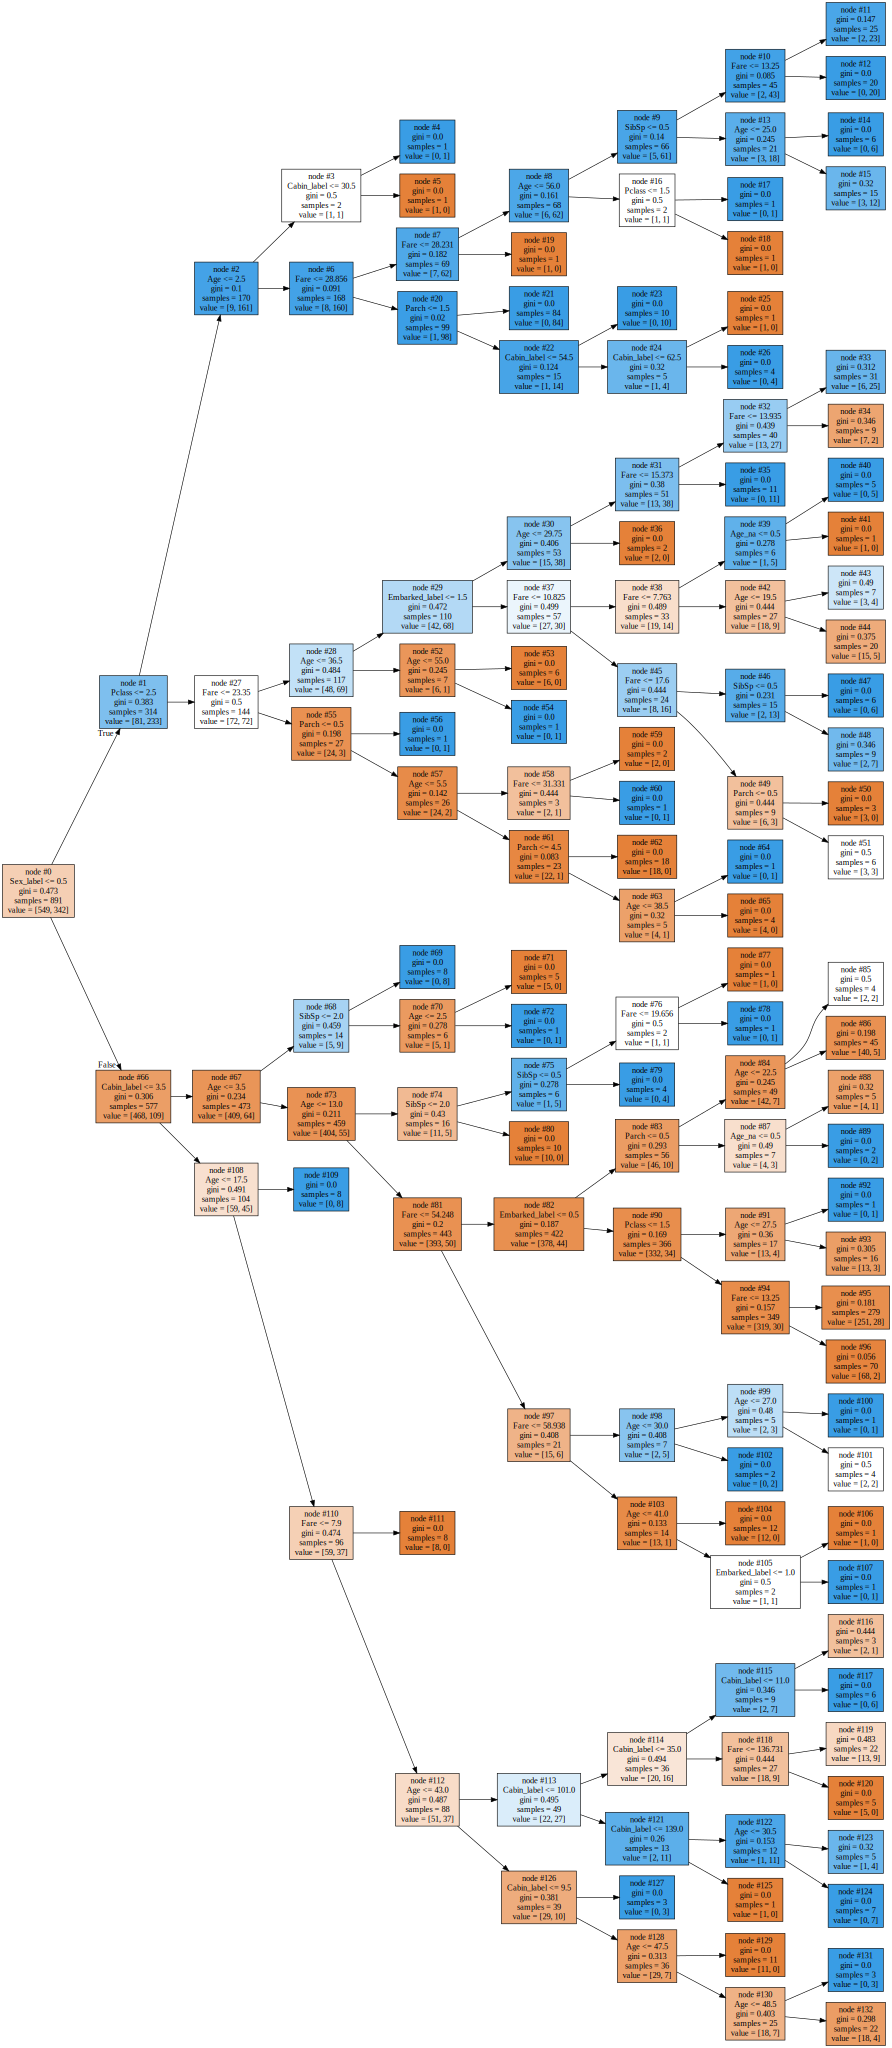

In [16]:
dts.show_decision_tree_structure()

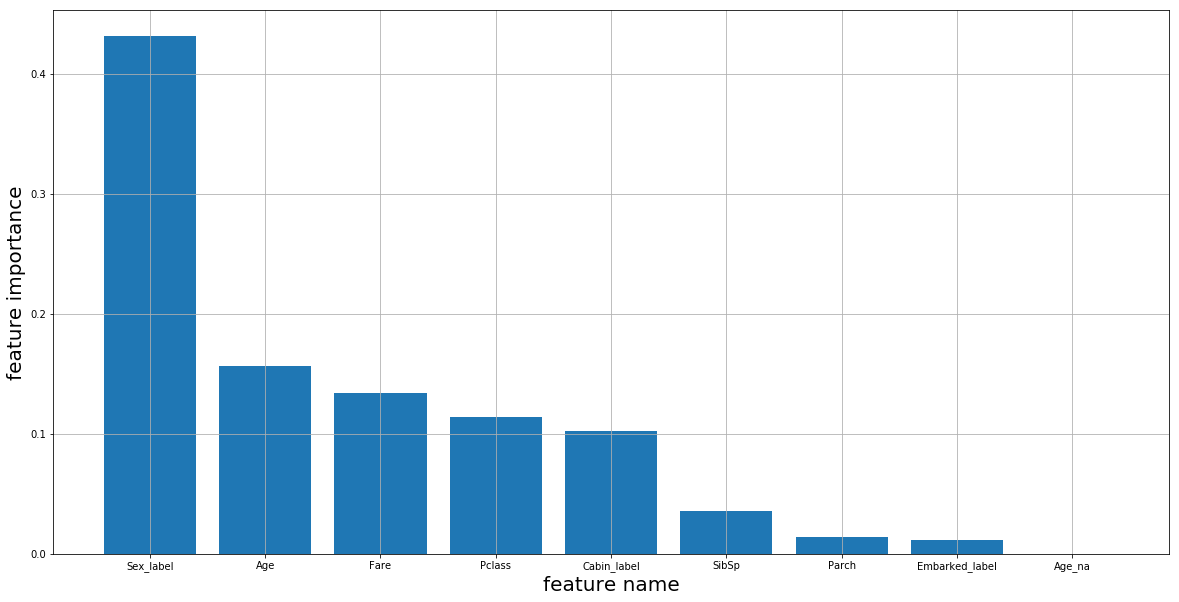

In [47]:
dts.show_features_importance()

In [19]:
train_raw[features].iloc[2]

Pclass             3.000
Age               26.000
Age_na             0.000
Sex_label          0.000
SibSp              0.000
Parch              0.000
Fare               7.925
Cabin_label       -1.000
Embarked_label     2.000
Name: 2, dtype: float64

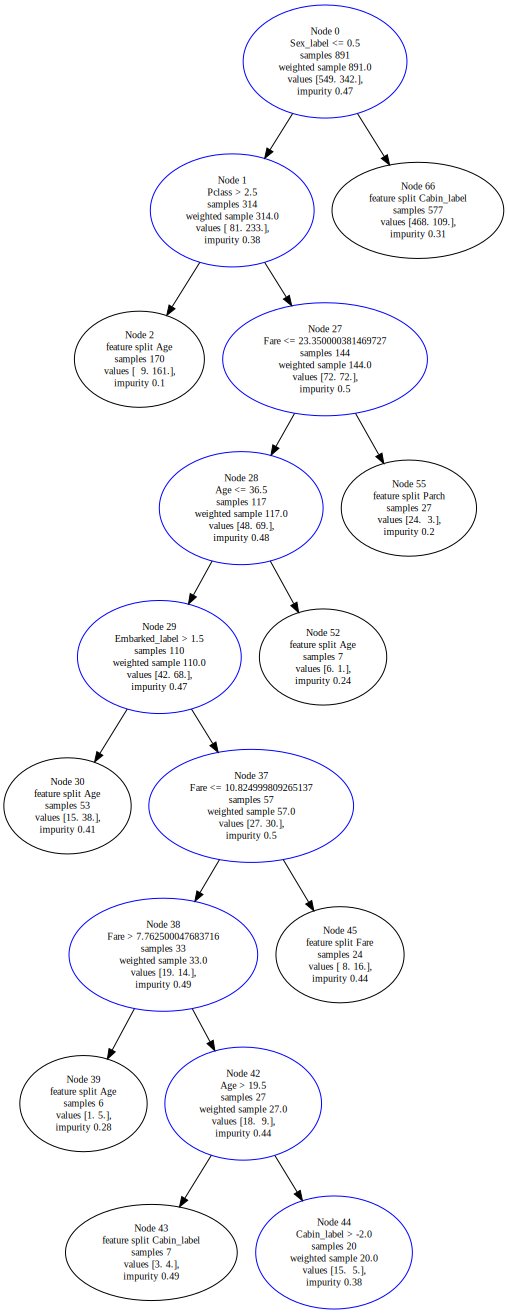

In [79]:
dts.show_decision_tree_prediction_path(train_raw[features].iloc[2])

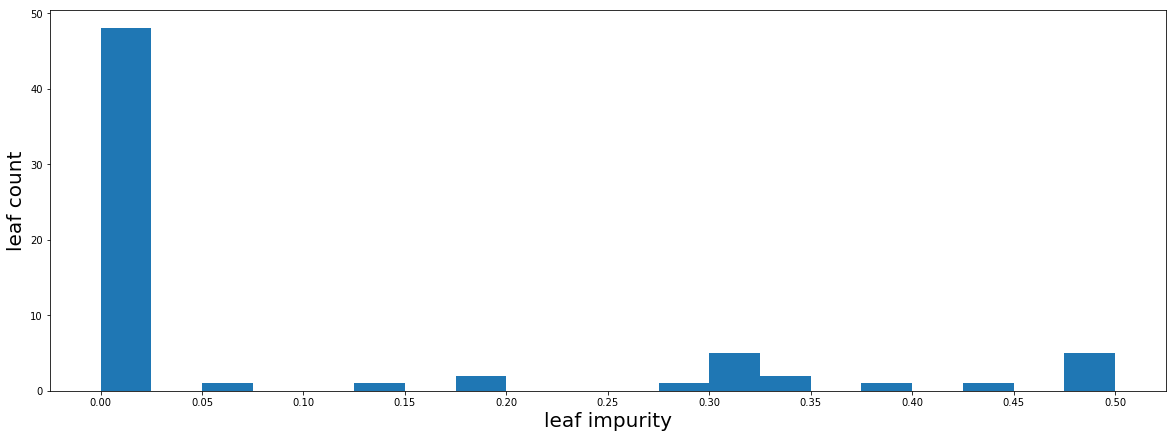

In [53]:
dts.show_leaf_impurity_distribution(bins = 20, figsize=(20,7))

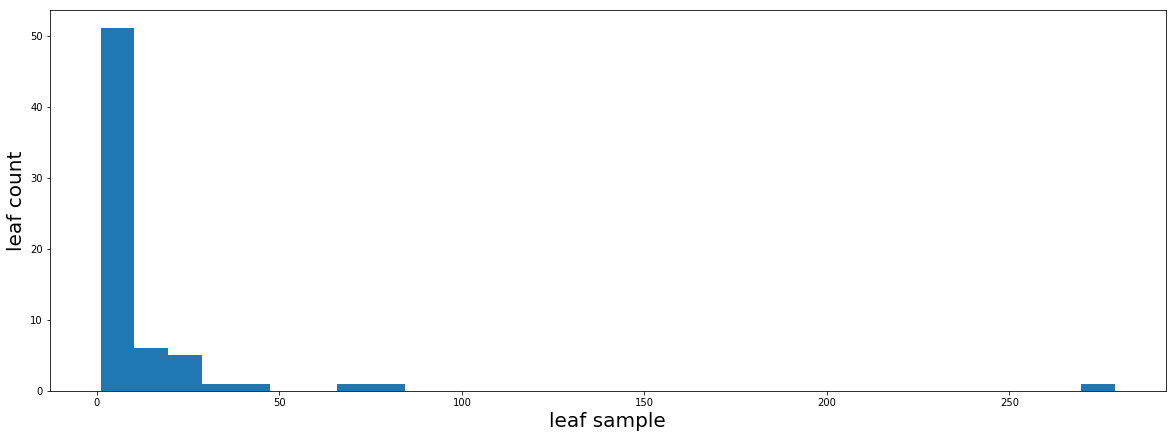

In [58]:
dts.show_leaf_samples_distribution(bins=30, figsize=(20,7))

what is the range of values for impurity ?

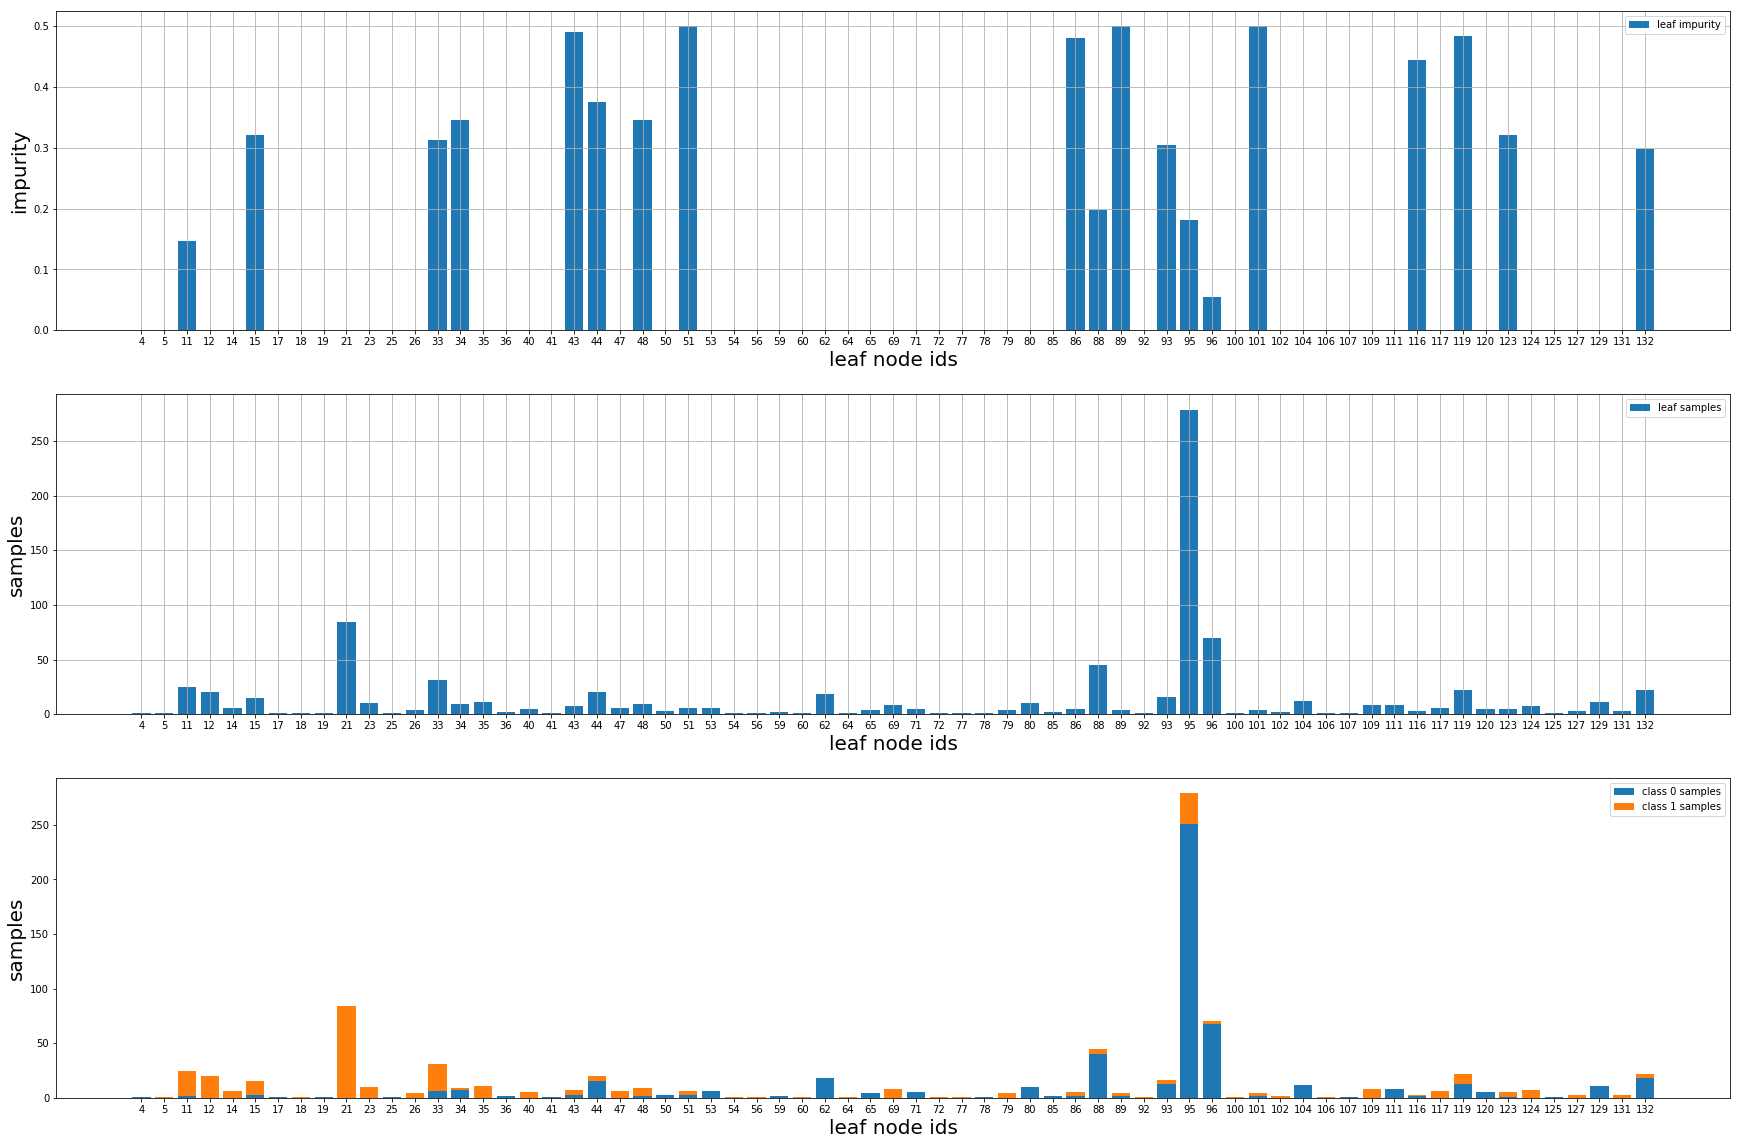

In [64]:
plt.figure(figsize=(30,20))
plt.subplot(3,1,1)
dts.show_leaf_impurity()

plt.subplot(3,1,2)
dts.show_leaf_samples()

plt.subplot(3,1,3)
dts.show_leaf_samples_by_class()


Pclass             3.000
Age               26.000
Age_na             0.000
Sex_label          0.000
SibSp              0.000
Parch              0.000
Fare               7.925
Cabin_label       -1.000
Embarked_label     2.000
Name: 2, dtype: float64
node id : 0, Sex_label <= 0.5, sample size 891, impurity 0.47 


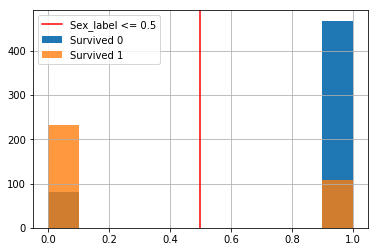

node id : 1, Pclass > 2.5, sample size 314, impurity 0.38 


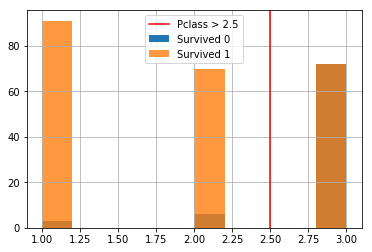

node id : 27, Fare <= 23.350000381469727, sample size 144, impurity 0.5 


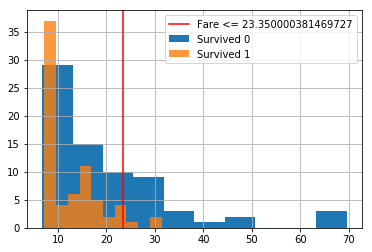

node id : 28, Age <= 36.5, sample size 117, impurity 0.48 


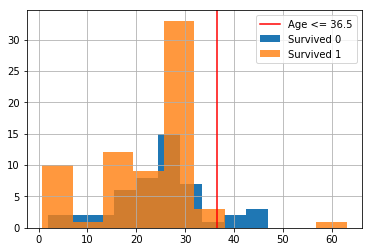

node id : 29, Embarked_label > 1.5, sample size 110, impurity 0.47 


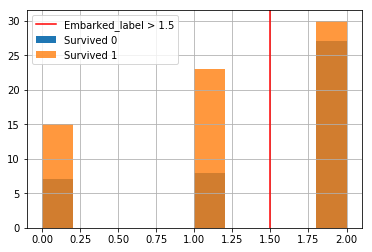

node id : 37, Fare <= 10.824999809265137, sample size 57, impurity 0.5 


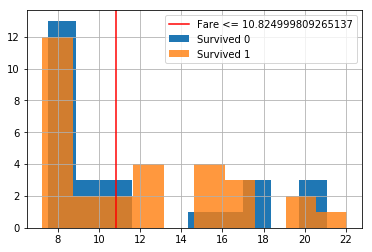

node id : 38, Fare > 7.762500047683716, sample size 33, impurity 0.49 


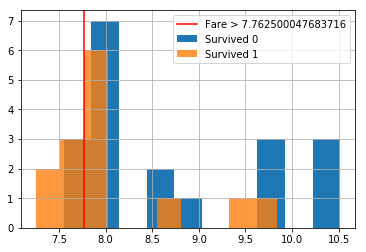

node id : 42, Age > 19.5, sample size 27, impurity 0.44 


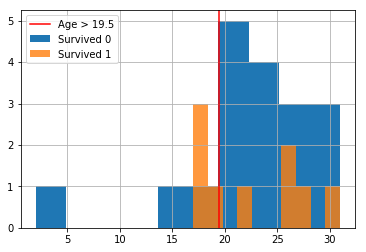

node id : 44, Cabin_label > -2.0, sample size 20, impurity 0.38 


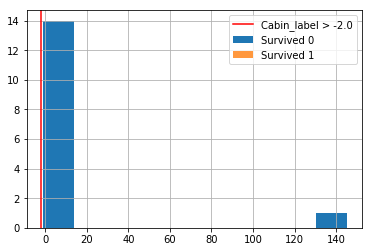

In [25]:
dts.show_decision_tree_splits_prediction(train_raw, 2, target)